In [1]:
import requests
from pyquery import PyQuery as pq

發現有亂碼的時候，就要確認編碼是否正確，可以看 html 查找

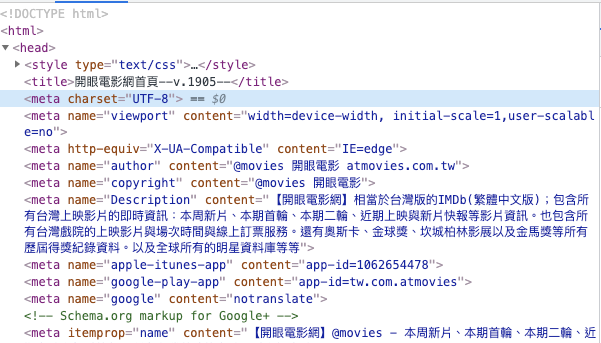

In [6]:
r = requests.get('http://www.atmovies.com.tw/home/')
r.encoding = 'utf-8'

In [7]:
r.text

'<!DOCTYPE HTML><html><head><title>開眼電影網首頁--v.1905--</title><meta charset="UTF-8" /><meta name="viewport" content="width=device-width, initial-scale=1,user-scalable=no"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="author" content="@movies 開眼電影 atmovies.com.tw"> <meta name="copyright" content="@movies 開眼電影"><meta name="Description" content="【開眼電影網】相當於台灣版的IMDb(繁體中文版)；包含所有台灣上映影片的即時資訊：本周新片、本期首輪、本期二輪、近期上映與新片快報等影片資訊。也包含所有台灣戲院的上映影片與場次時間與線上訂票服務。還有奧斯卡、金球獎、坎城柏林影展以及金馬獎等所有歷屆得獎紀錄資料。以及全球所有的明星資料庫等等"><meta name="apple-itunes-app" content="app-id=1062654478"><meta name="google-play-app" content="app-id=tw.com.atmovies"><meta name="google" content="notranslate" /> <!-- Schema.org markup for Google+ --> <meta itemprop="name" content="【開眼電影網】@movies - 本周新片、本期首輪、本期二輪、近期上映與新片快報；所有台灣戲院的上映影片與場次時間"> <meta itemprop="description" content="【開眼電影網】相當於台灣版的IMDb(繁體中文版)；包含所有台灣上映影片的即時資訊：本周新片、本期首輪、本期二輪、近期上映與新片快報等影片資訊。也包含所有台灣戲院的上映影片與場次時間與線上訂票服務。還有奧斯卡、金球獎、坎城柏林影展以及金馬獎等所有歷屆得獎紀錄資料。以及全球所有的明星資料庫等等"> <meta

# 發現無法找到所有列表，推測是使用 Javascript 渲染 改用 request_html 套件

In [10]:
from requests_html import HTMLSession

# 獲取請求對象 
session = HTMLSession() 
# 往巴哈姆特動畫瘋發送get請求 
atmovies = session.get('http://www.atmovies.com.tw/home/') 
atmovies.encoding = 'utf-8'

atmovies.text

'<!DOCTYPE HTML><html><head><title>開眼電影網首頁--v.1905--</title><meta charset="UTF-8" /><meta name="viewport" content="width=device-width, initial-scale=1,user-scalable=no"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="author" content="@movies 開眼電影 atmovies.com.tw"> <meta name="copyright" content="@movies 開眼電影"><meta name="Description" content="【開眼電影網】相當於台灣版的IMDb(繁體中文版)；包含所有台灣上映影片的即時資訊：本周新片、本期首輪、本期二輪、近期上映與新片快報等影片資訊。也包含所有台灣戲院的上映影片與場次時間與線上訂票服務。還有奧斯卡、金球獎、坎城柏林影展以及金馬獎等所有歷屆得獎紀錄資料。以及全球所有的明星資料庫等等"><meta name="apple-itunes-app" content="app-id=1062654478"><meta name="google-play-app" content="app-id=tw.com.atmovies"><meta name="google" content="notranslate" /> <!-- Schema.org markup for Google+ --> <meta itemprop="name" content="【開眼電影網】@movies - 本周新片、本期首輪、本期二輪、近期上映與新片快報；所有台灣戲院的上映影片與場次時間"> <meta itemprop="description" content="【開眼電影網】相當於台灣版的IMDb(繁體中文版)；包含所有台灣上映影片的即時資訊：本周新片、本期首輪、本期二輪、近期上映與新片快報等影片資訊。也包含所有台灣戲院的上映影片與場次時間與線上訂票服務。還有奧斯卡、金球獎、坎城柏林影展以及金馬獎等所有歷屆得獎紀錄資料。以及全球所有的明星資料庫等等"> <meta

# 他是採用影片跑馬燈的方式放在裡面，這種最簡單的方式就是進去這網址爬

http://www.atmovies.com.tw/james-parallelism/newfilm.html

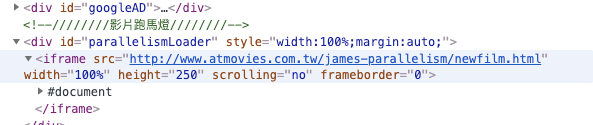

In [21]:
# 獲取請求對象 
session = HTMLSession() 
# 往巴哈姆特動畫瘋發送get請求 
atmovies = session.get('http://www.atmovies.com.tw/james-parallelism/newfilm.html') 
atmovies.encoding = 'utf-8'
print(atmovies.text)

<!DOCTYPE HTML>
<html>
	<head>
		<title>@movies【開眼電影網】http://www.atmovies.com.tw</title>
		<meta charset="utf-8" />
		<meta name="viewport" content="width=device-width, initial-scale=1" />
		<!--[if lte IE 8]><script src="assets/js/ie/html5shiv.js"></script><![endif]-->
		<link rel="stylesheet" href="assets/css/main2.css" />
		<noscript><link rel="stylesheet" href="assets/css/noscript.css" /></noscript>
		<!--[if lte IE 8]><link rel="stylesheet" href="assets/css/ie8.css" /><![endif]-->
		<!--[if lte IE 9]><link rel="stylesheet" href="assets/css/ie9.css" /><![endif]-->
	<!-- Scripts -->
			<script src="assets/js/jquery.min.js"></script>
			<script src="assets/js/jquery.poptrox.min.js"></script>
			<script src="assets/js/skel.min.js"></script>
			<script src="assets/js/skel-viewport.min.js"></script>
			<script src="assets/js/util.js"></script>
			<!--[if lte IE 8]><script src="assets/js/ie/respond.min.js"></script><![endif]-->
			<script src="assets/js/main.js"></script>
	</head>
	<body

In [22]:
page = pq(atmovies.text)

In [33]:
for block in page(".item"): # class 為 item thumb 但是 pyquery 不支援空白 就直接取前面的 item
    movie = pq(block).text().strip()
    print(movie)

★
死亡漩渦：奪魂鋸新遊戲
★
催魂頻率
★
轉彎之後
★
LIP X LIP享受這世界的方法
★
綠色牢籠
★
相信黎明的到來
★
癡情馬殺雞
★
外遇遊戲
★
失重青春
當男人戀愛時
聽見歌 再唱
那些要我死的人
名偵探柯南：緋色的彈丸
如果雨之後
玩命鈔劫
操控
鬼護士
永生戰
死亡連鎖
惡水真相
父親
哥吉拉大戰金剛
永遠的我們
迴憶
布吉闖籃關
開眼E週報
